In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress the SettingWithCopyWarning
warnings.filterwarnings("ignore")


In [2]:
data_ingest = pd.read_csv('PADCHEST_chest_x_ray_images_labels_160K_01.02.19.csv',  low_memory=False)

In [3]:
print(f'There are {data_ingest.shape[0]} rows and {data_ingest.shape[1]} columns in this data frame')

There are 160861 rows and 36 columns in this data frame


In [4]:
# # select data from director 0 and directory 1.
# #data_ingest = data_ingest[(data_ingest.ImageDir==0 )| 
#                    (data_ingest.ImageDir==1)]


# for this exercise, we will work with directory zero for efficiency.
data_ingest = data_ingest[(data_ingest.ImageDir==0)]

## Select the data which has either  label normal or pneumonia.

In [5]:
# # Excluding labels including the 'suboptimal study' label
# data_prep = data_ingest[(data_ingest["Labels"].str.contains('pneumonia')) | 
#                         (data_ingest["Labels"].str.contains('normal')) |
#                         (data_ingest["Labels"].str.contains('atypical pneumonia'))]
# data_prep.head()

In [6]:
# Define keywords for each category
normal_keywords = ['normal']
pneumonia_keywords = ['pneumonia']
other_pneumonia_keywords = ['atypical pneumonia']

# Create new columns based on the keywords
data_ingest['normal'] = data_ingest['Labels'].apply(lambda x: 1. if any(keyword in x for keyword in normal_keywords) else 0.)
data_ingest['pneumonia'] = data_ingest['Labels'].apply(lambda x: 1. if any(keyword in x for keyword in pneumonia_keywords) else 0.)
data_ingest['other_pneumonia'] = data_ingest['Labels'].apply(lambda x: 1. if any(keyword in x for keyword in other_pneumonia_keywords) else 0.)


data_ingest = data_ingest[data_ingest['Projection']=='PA']
# Display the resulting DataFrame
data_ingest.head()


,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,normal,pneumonia,other_pneumonia
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],1.0,0.0,0.0
2,2,135803415504923515076821959678074435083_fzis7b...,0,20150914,135803415504923515076821959678074435083,313572750430997347502932654319389875966,1929.0,M,POSTEROANTERIOR,PA,...,cambi pulmonar cronic sever . sign fibrosis b...,Physician,"['pulmonary fibrosis', 'chronic changes', 'kyp...","['loc basal', 'loc basal bilateral']","[['pulmonary fibrosis', 'loc basal bilateral']...",['C0034069' 'C0742362' 'C2115817' 'C3544344'],['C1282378'],0.0,0.0,0.0
3,3,113855343774216031107737439268243531979_3k951l...,0,20150717,113855343774216031107737439268243531979,50783093527901818115346441867348318648,1925.0,F,POSTEROANTERIOR,PA,...,. . siluet cardi mediastin dentr normal . cam...,Physician,['chronic changes'],"['loc cardiac', 'loc mediastinum', 'loc costop...","[['chronic changes'], ['chronic changes'], ['n...",['C0742362'],['C1522601' 'C0025066' 'C0230151'],0.0,0.0,0.0
7,7,3137231742710829928-247610802266403640553_kine...,0,20150804,3137231742710829928-247610802266403640553,93535126770783451980359712286922420997,1957.0,M,NaN,PA,...,radiografi actual comp con previ 26 juni pers...,Physician,"['laminar atelectasis', 'pleural effusion', 'a...","['loc basal', 'loc subsegmental', 'loc pleural...","[['laminar atelectasis', 'loc subsegmental', '...",['C2073625' 'C4305366' 'C0185792'],['C1282378' 'C0929165' 'C0032225' 'C0444532' '...,0.0,0.0,0.0
12,12,105529804483623054726294337265160703666_6zn76a...,0,20161004,105529804483623054726294337265160703666,244685263100771469051214745085012030119,1945.0,F,PA,PA,...,cabez cuell humeral derech apreci lesion suge...,Physician,"['superior mediastinal enlargement', 'aortic e...","['loc supra aortic', 'loc bone', 'loc humeral ...","[['superior mediastinal enlargement', 'supra a...",['C4273001' 'C0036439' 'C4315325' 'C4290224' '...,['C0262950' 'C0223683' 'C0020164' 'C0003483' '...,0.0,0.0,0.0


In [7]:
# data_ingest.Labels.unique()

In [8]:
data_ingest.normal.value_counts()

normal
0.0    1185
1.0     627
Name: count, dtype: int64

In [9]:
data_ingest.pneumonia.value_counts()

pneumonia
0.0    1744
1.0      68
Name: count, dtype: int64

In [10]:
data_ingest.other_pneumonia.value_counts()

other_pneumonia
0.0    1810
1.0       2
Name: count, dtype: int64

In [11]:
data = data_ingest[(data_ingest['normal']==1) |
                (data_ingest['pneumonia']==1) | 
                (data_ingest['other_pneumonia']==1)]

In [12]:
data.head()

,Unnamed: 0,ImageID,ImageDir,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,...,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,normal,pneumonia,other_pneumonia
0,0,20536686640136348236148679891455886468_k6ga29.png,0,20140915,20536686640136348236148679891455886468,839860488694292331637988235681460987,1930.0,F,POSTEROANTERIOR,PA,...,sin hallazg patolog edad pacient .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],1.0,0.0,0.0
14,14,238285621348398466668514178112618553012_a7k6dv...,0,20171024,238285621348398466668514178112618553012,76478060312810134599679306720116852498,1987.0,F,PA,PA,...,sin alter radiolog significacion .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],1.0,0.0,0.0
15,15,152191969602076825998375638267191596461_ck9qkz...,0,20150508,152191969602076825998375638267191596461,211676018114322936525876155155978326212,1958.0,F,POSTEROANTERIOR,PA,...,sin hallazg radiolog signific .,Physician,['normal'],[],[['normal']],[],[],1.0,0.0,0.0
20,20,84289138814897824414670894017743137660_xjsw7k.png,0,20140414,84289138814897824414670894017743137660,132905598244344199302356904572008903408,1997.0,F,POSTEROANTERIOR,PA,...,normal .,Physician,['normal'],[],"[['normal'], ['normal']]",[],[],1.0,0.0,0.0
24,24,258055173326723517262722952856353517225_gxjwwm...,0,20150116,258055173326723517262722952856353517225,163995406284018596913093962224045518908,1960.0,M,NaN,PA,...,no apreci infiltr ni condens pulmonar .,Physician,['normal'],[],[['normal']],[],[],1.0,0.0,0.0


In [13]:
data.shape

(695, 39)

In [14]:
# check shape of the data
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in this data frame')

There are 695 rows and 39 columns in this data frame


In [15]:
# we do need the following columns to analysis the dataser.
data.drop(['Unnamed: 0', 'ImageDir'], axis = 1, inplace = True)

In [16]:
print(f"The total patient ids are {data['PatientID'].count()}, from those the unique ids are {data['PatientID'].value_counts().shape[0]} ")

The total patient ids are 695, from those the unique ids are 678 


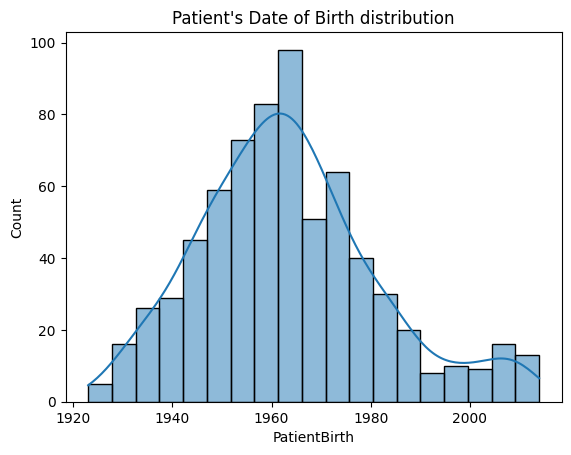

In [17]:
sns.histplot(data['PatientBirth'], kde = True)
plt.title('Patient\'s Date of Birth distribution')
plt.show()

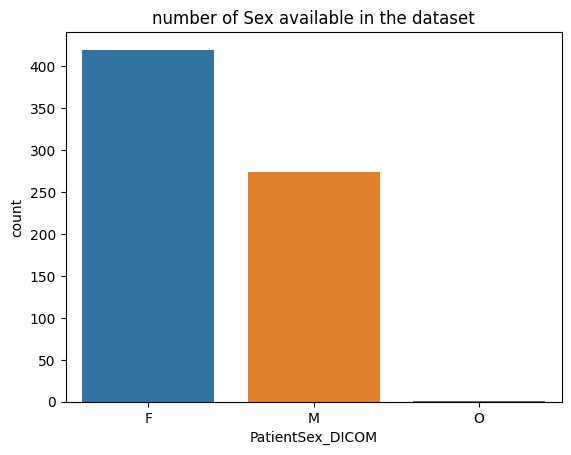

In [18]:
sns.countplot(data = data, x = 'PatientSex_DICOM')
plt.title('number of Sex available in the dataset')
plt.show()

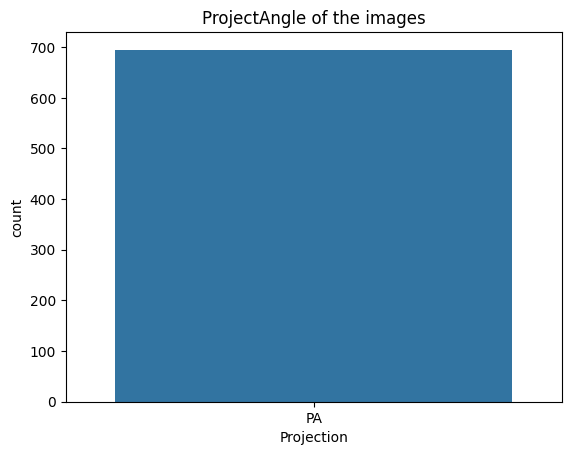

In [19]:

sns.countplot(data = data, x = 'Projection')
plt.title('ProjectAngle of the images')
plt.show()

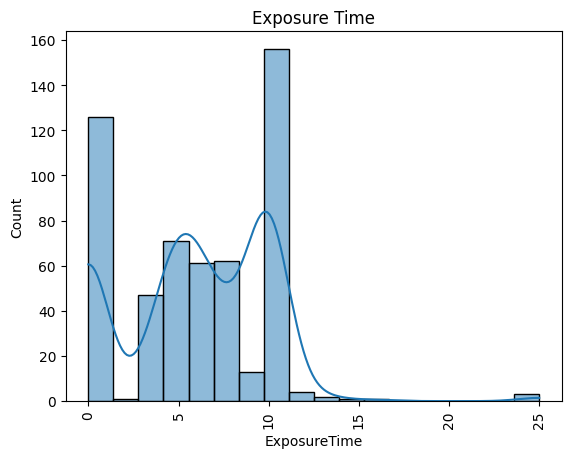

In [20]:

sns.histplot(data['ExposureTime'], kde = True)
plt.xticks(rotation = 90)
plt.title('Exposure Time')
plt.show()

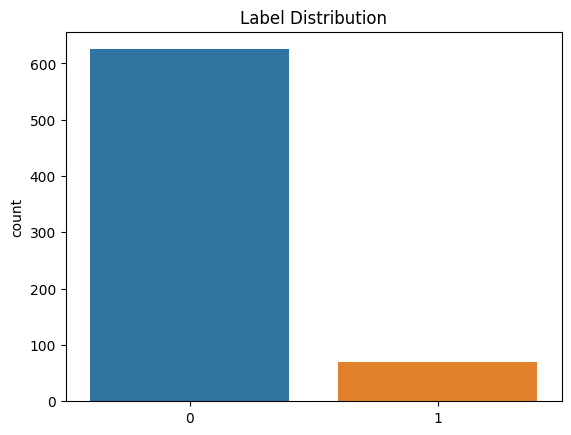

In [21]:
y_label = pd.Series([0 if i == "['normal']" else 1 for i in data['Labels']])
sns.countplot(x= y_label)
plt.title('Label Distribution')
plt.show()

In [22]:
import os

In [23]:

# Extract numpy values from Image column in data frame
images = data['ImageID'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

In [24]:
selected_images = ['32984067162293851477953321590068608041_ajmomz.png',
 '117948971976651446594416064640058242218_ovc55i.png',
 '66542221742995885584652303672522208992_gjjvxg.png',
 '228147380768553292159728012597011580620_8p6by5.png',
 '84073976391871078977269648559238898238_a4r3kc.png',
 '67174718755424410647421129526728544213_ntt5l0.png',
 '216228207147446083228153317485678658271-2_q3plj2.png',
 '278145958936920136774696500785123128624_huslud.png',
 '208622714672496361979101298586098351575_bmbth7.png']

Display Random Images


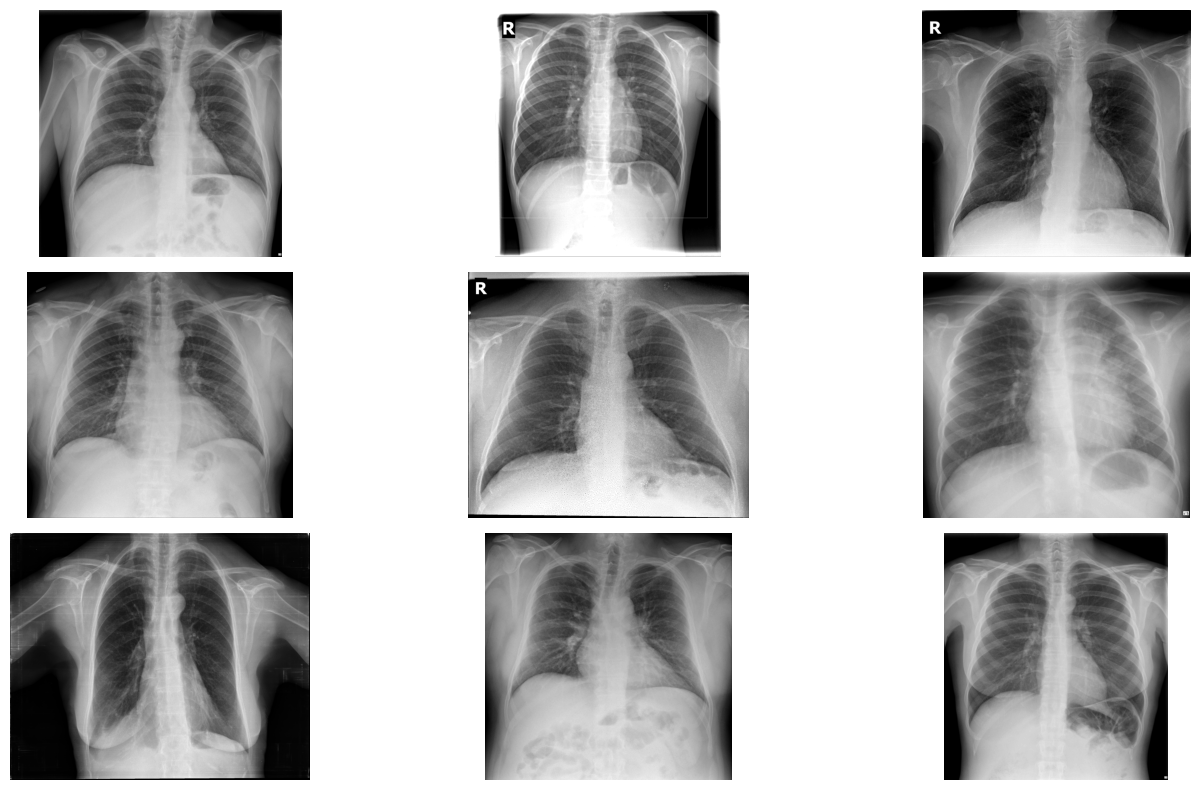

In [25]:
# Location of the image dir
img_dir = 'data_dir/'

print('Display Random Images')
# Adjust the size of your images
plt.figure(figsize=(15,8))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir , random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

The dimensions of the image are 2722 pixels width and 2612 pixels height, one single color channel
The maximum pixel value is 0.9739 and the minimum is 0.0000
The mean value of the pixels is 0.5252 and the standard deviation is 0.2149


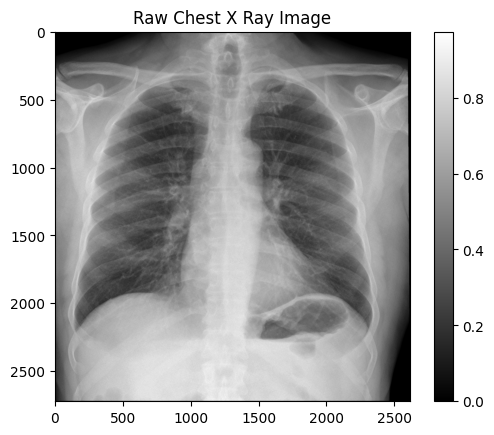

In [26]:
# Get the first image that was listed in the train_df dataframe
raw_image = plt.imread(os.path.join(img_dir, selected_images[2]))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

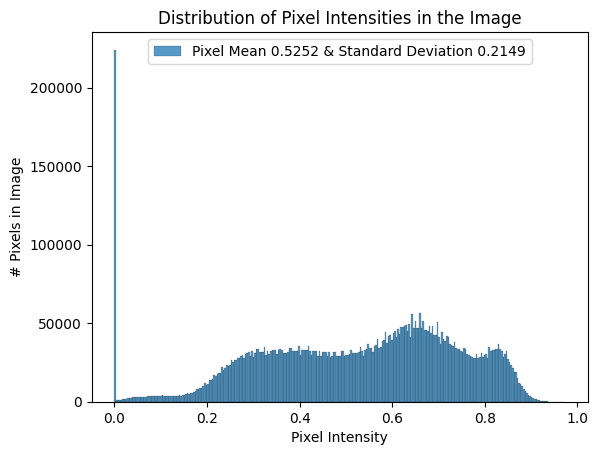

In [27]:
# Plot a histogram of the distribution of the pixels
sns.histplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}')
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

### Next task is to create the dataset for selected frame. Balance the dataset or create a custome made lose function for imbalance dataset.

- find the images from different directory which has same labels.
- Crate dataset
- split dataset with no patient repitition.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K


from keras.models import load_model
from sklearn.model_selection import train_test_split

import util
# from public_tests import *
# from test_utils import *

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [29]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow.compat.v1.logging import INFO, set_verbosity
import os

random.seed(a=None, version=2)

set_verbosity(INFO)


def get_mean_std_per_batch(image_dir, df, H=320, W=320):
    sample_data = []
    for img in df.sample(100)["ImageID"].values:
        image_path = os.path.join(image_dir, img)
        sample_data.append(
            np.array(image.load_img(image_path, target_size=(H, W))))

    mean = np.mean(sample_data, axis=(0, 1, 2, 3))
    std = np.std(sample_data, axis=(0, 1, 2, 3), ddof=1)
    return mean, std


def load_image(img, image_dir, df, preprocess=True, H=320, W=320):
    """Load and preprocess image."""
    mean, std = get_mean_std_per_batch(image_dir, df, H=H, W=W)
    img_path = os.path.join(image_dir, img)
    x = image.load_img(img_path, target_size=(H, W))
    if preprocess:
        x -= mean
        x /= std
        x = np.expand_dims(x, axis=0)
    return x


# def grad_cam(input_model, image, cls, layer_name):
#     """GradCAM method for visualizing input saliency."""
    
#     y_c = input_model.output[0, cls]
#     conv_output = input_model.get_layer(layer_name).output
#     grads = K.gradients(y_c, conv_output)[0]

#     gradient_function = K.function([input_model.input], [conv_output, grads])

#     output, grads_val = gradient_function([image])
#     output, grads_val = output[0, :], grads_val[0, :, :, :]

#     weights = np.mean(grads_val, axis=(0, 1))
#     cam = np.dot(output, weights)

#     # Process CAM
#     cam = cv2.resize(cam, (W, H), cv2.INTER_LINEAR)
#     cam = np.maximum(cam, 0)
#     cam = cam / cam.max()
#     return cam


def compute_gradcam(model, img, image_dir, df, labels, selected_labels,
                    layer_name='bn'):
    preprocessed_input = load_image(img, image_dir, df)
    predictions = model.predict(preprocessed_input)

    print("Loading original image")
    plt.figure(figsize=(15, 10))
    plt.subplot(151)
    plt.title("Original")
    plt.axis('off')
    plt.imshow(load_image(img, image_dir, df, preprocess=False), cmap='gray')

    j = 1
    for i in range(len(labels)):
        if labels[i] in selected_labels:
            print(f"Generating gradcam for class {labels[i]}")
            gradcam = grad_cam(model, preprocessed_input, i, layer_name)
            plt.subplot(151 + j)
            plt.title(f"{labels[i]}: p={predictions[0][i]:.3f}")
            plt.axis('off')
            plt.imshow(load_image(img, image_dir, df, preprocess=False),
                       cmap='gray')
            plt.imshow(gradcam, cmap='jet', alpha=min(0.5, predictions[0][i]))
            j += 1


def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:, i]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.show()
    return auc_roc_vals


In [30]:
remain_set, test_set = train_test_split(data, test_size = 0.15, random_state = 27, shuffle=True)

In [31]:
train_set, val_set = train_test_split(remain_set, test_size = 0.15, random_state = 27, shuffle=True)

In [32]:
labels = ['normal', 'pneumonia', 'other_pneumonia']

In [118]:
image_directory = "data_dir/"
image_height = 224
image_width = 224

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,  # Define your preprocess_image function here
    rescale=1.0/255.0,  # Normalize pixel values
)

# Create TensorFlow generators for training and validation
batch_size = 32

train_generator = datagen.flow_from_dataframe(
    dataframe=train_set,
    directory=image_directory,
    x_col='ImageID',
    y_col=labels,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='raw',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_set,
    directory=image_directory,
    x_col='ImageID',
    y_col=labels,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_set,
    directory=image_directory,
    x_col='ImageID',
    y_col=labels,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='raw',
    shuffle=False
)

Found 501 validated image filenames.
Found 89 validated image filenames.
Found 105 validated image filenames.


In [35]:
def check_for_leakage(df1, df2, patient_col):
    """
    Return True if there any patients are in both df1 and df2.

    Args:
        df1 (dataframe): dataframe describing first dataset
        df2 (dataframe): dataframe describing second dataset
        patient_col (str): string name of column with patient IDs
    
    Returns:
        leakage (bool): True if there is leakage, otherwise False
    """

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    df1_patients_unique = df1[patient_col].nunique()
    df2_patients_unique = df2[patient_col].nunique()
    
    patients_in_both_groups = df1_patients_unique+df2_patients_unique

    # leakage contains true if there is patient overlap, otherwise false.
    leakage = len(list(set(df1[patient_col].values).intersection(set(df2[patient_col].values)))) > 0 # boolean (true if there is at least 1 patient in both groups)
    
    ### END CODE HERE ###
    
    return leakage

In [36]:
print("leakage between train and valid: {}".format(check_for_leakage(train_set, val_set, 'PatientID')))
print("leakage between train and test: {}".format(check_for_leakage(train_set, test_set, 'PatientID')))
print("leakage between valid and test: {}".format(check_for_leakage(val_set, test_set, 'PatientID')))

leakage between train and valid: True
leakage between train and test: True
leakage between valid and test: True


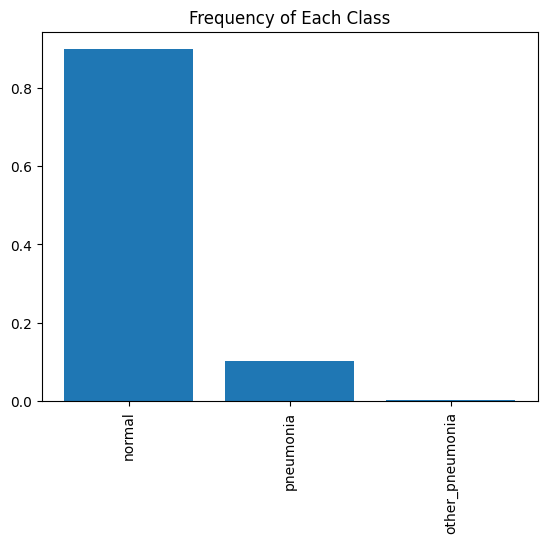

In [37]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [38]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0)/N
    negative_frequencies = 1 - positive_frequencies

    ### END CODE HERE ###
    return positive_frequencies, negative_frequencies

In [39]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.89820359, 0.10179641, 0.00399202])

In [230]:
freq_neg

array([0.10179641, 0.89820359, 0.99600798])

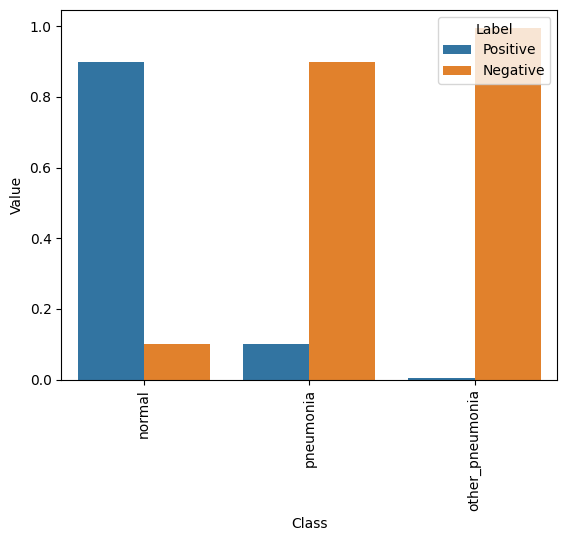

In [40]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
#data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)

data = pd.concat([data, pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)])])
plt.xticks(rotation=90)


f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [41]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

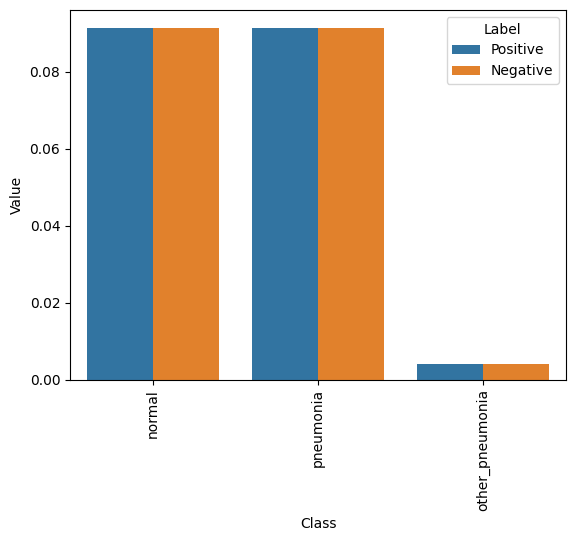

In [42]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
#data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
#                         for l,v in enumerate(neg_contribution)], ignore_index=True)

data = pd.concat([data, pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)])])
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

In [43]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (float): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0
        
        ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss += K.mean(-(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon)
                            + neg_weights[i] * (1 - y_true[:, i]) * K.log((1 - y_pred[:, i]) + epsilon))) #complete this line
        return loss
    
        ### END CODE HERE ###
    return weighted_loss

In [102]:

# Create the ResNet-50 model
# base_model = ResNet50(weights='imagenet', include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# predictions = Dense(3, activation='sigmoid')(x)  # Assuming 3 output classes


# create the base pre-trained model
base_model = DenseNet121(weights='densenet.hdf5', include_top=False)
x = base_model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)
# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)


model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights), metrics=['accuracy'])
# Train the model
epochs = 40
model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/40
16/16 [==============================] - 116s 7s/step - loss: 0.3360 - accuracy: 0.4691 - val_loss: 1.2901 - val_accuracy: 0.2247
Epoch 2/40
16/16 [==============================] - 107s 7s/step - loss: 0.2594 - accuracy: 0.6188 - val_loss: 1.1257 - val_accuracy: 0.5506
Epoch 3/40
16/16 [==============================] - 107s 7s/step - loss: 0.2525 - accuracy: 0.3792 - val_loss: 1.7643 - val_accuracy: 0.0225
Epoch 4/40
16/16 [==============================] - 111s 7s/step - loss: 0.2516 - accuracy: 0.3952 - val_loss: 1.4264 - val_accuracy: 0.0225
Epoch 5/40
16/16 [==============================] - 109s 7s/step - loss: 0.2260 - accuracy: 0.5589 - val_loss: 0.5427 - val_accuracy: 0.0225
Epoch 6/40
16/16 [==============================] - 108s 7s/step - loss: 0.2287 - accuracy: 0.5689 - val_loss: 0.7727 - val_accuracy: 0.0000e+00
Epoch 7/40
16/16 [==============================] - 109s 7s/step - loss: 0.2184 - accuracy: 0.5808 - val_loss: 0.9715 - val_accuracy: 0.0112
Epoch 8/4

In [103]:
predicted_vals = model.predict_generator(val_generator, steps = len(val_generator))

In [125]:
predicted_test = model.predict_generator(val_generator, steps = len(test_generator))

Error in generating ROC curve for other_pneumonia. Dataset lacks enough examples.


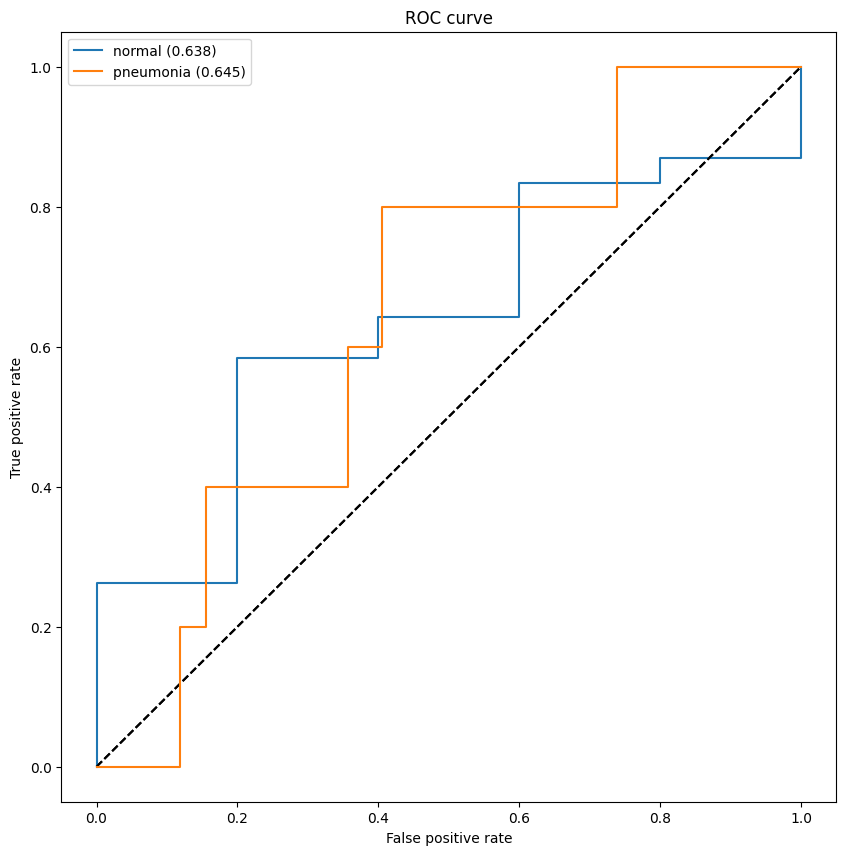

In [231]:
auc_rocs = get_roc_curve(labels, predicted_vals, val_generator)

In [113]:
val_set[val_set['pneumonia']==1]

,ImageID,StudyDate_DICOM,StudyID,PatientID,PatientBirth,PatientSex_DICOM,ViewPosition_DICOM,Projection,MethodProjection,Pediatric,...,Report,MethodLabel,Labels,Localizations,LabelsLocalizationsBySentence,labelCUIS,LocalizationsCUIS,normal,pneumonia,other_pneumonia
129,187498967718070219729635885830255440507_laei4c...,20161114,187498967718070219729635885830255440507,158586811298766825080480943614711200942,1988.0,M,PA,PA,Manual review of DICOM fields,No,...,infiltr retrocardiac si clinic compat proces ...,Physician,"['pneumonia', 'infiltrates']",['loc retrocardiac'],"[['pneumonia', 'infiltrates', 'loc retrocardia...",['C0032285' 'C0277877'],[],0.0,1.0,0.0
1424,142402046987881038220855646720260139583_yg7yhw...,20150409,142402046987881038220855646720260139583,133324317880737462215955897051342430384,1962.0,F,NaN,PA,Manual review of DICOM fields,No,...,. . siluet cardiomediastin dentr normal sen c...,Physician,"['increased density', 'pneumonia']","['loc cardiac', 'loc rib', 'loc lobar', 'loc r...","[['increased density', 'pneumonia', 'loc rib',...",['C1443940' 'C0032285'],['C1522601' 'C0035561' 'C0225752' 'C0444532' '...,0.0,1.0,0.0
2510,145380459765687724716404258126556031463_gw088y...,20150706,145380459765687724716404258126556031463,176768513061126376247119160743272770905,1965.0,M,NaN,PA,Manual review of DICOM fields,No,...,cambi pulmonar cronic . apreci aument densid ...,Physician,"['atelectasis', 'increased density', 'chronic ...","['loc right lower lobe', 'loc costoesternal', ...","[['atelectasis', 'loc retrocardiac'], ['increa...",['C0004144' 'C1443940' 'C0742362' 'C0032285'],['C1261075' 'C0450216' 'C4281590' 'C0443246'],0.0,1.0,0.0
736,181385514851957423984114075876930886946_t1bip0...,20140711,181385514851957423984114075876930886946,13928058461068790273171308006158728346,1951.0,F,NaN,PA,Manual review of DICOM fields,No,...,neumoni subsegmentari camp medi pulmon izquie...,Physician,['pneumonia'],"['loc subsegmental', 'loc lung field', 'loc mi...","[['pneumonia', 'loc subsegmental', 'loc lung f...",['C0032285'],['C0929165' 'C0225759' 'C0929434' 'C0443246'],0.0,1.0,0.0
591,115008224852512311684333915544316921428_lfb5k9...,20141205,115008224852512311684333915544316921428,91067011973298381253326080518970873487,2005.0,F,NaN,PA,Manual review of DICOM fields,No,...,aument densid terci inferior hemitorax derech...,Physician,['pneumonia'],"['loc pleural', 'loc right', 'loc hemithorax']","[['exclude'], ['pneumonia', 'loc pleural', 'lo...",['C0032285'],['C0032225' 'C0444532' 'C0934569'],0.0,1.0,0.0


In [123]:

# Path to the image you want to visualize
image = '187498967718070219729635885830255440507_laei4c.png'

image_path = image_directory+image

1/1 [==============================] - 0s 78ms/step


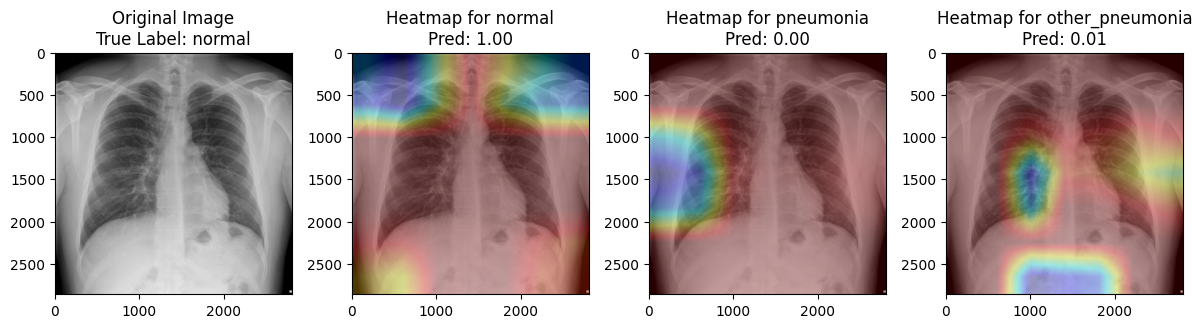

In [127]:
import tensorflow as tf
import numpy as np
import cv2

def get_gradcam_heatmap(model, img_array, layer_name, class_idx):
    img_batch = np.expand_dims(img_array, axis=0)
    
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_batch)
        loss = predictions[:, class_idx]
    
    grads = tape.gradient(loss, conv_output)
    
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv_output = conv_output[0]
    heatmap = tf.reduce_sum(pooled_grads * conv_output, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    return heatmap

def overlay_heatmap(image_path, heatmap):
    img = cv2.imread(image_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlaid_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
    return overlaid_img

# Preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values

# Specify the layer name you want to visualize
layer_name = 'conv5_block16_2_conv'  # Change this to the desired layer in your model

# Get the Grad-CAM heatmaps for each class
num_classes = 3  # Change this based on the number of output classes
heatmaps = []
for class_idx in range(num_classes):
    heatmap = get_gradcam_heatmap(model, img_array, layer_name, class_idx)
    heatmaps.append(heatmap)

# Overlay the heatmaps on the original image
overlaid_imgs = [overlay_heatmap(image_path, heatmap) for heatmap in heatmaps]

# Get class names and predicted probabilities from the model
class_names = ['normal', 'pneumonia', 'other_pneumonia']
predicted_probabilities = model.predict(np.expand_dims(img_array, axis=0)).squeeze()

# Plot the images and heatmaps using matplotlib
plt.figure(figsize=(15, 10))
plt.subplot(1, num_classes + 2, 1)
img = cv2.imread(image_path)
plt.imshow(img)
plt.title(f'Original Image\nTrue Label: {class_names[np.argmax(predicted_probabilities)]}')

for class_idx in range(num_classes):
    plt.subplot(1, num_classes + 2, class_idx + 2)
    plt.imshow(overlaid_imgs[class_idx])
    plt.title(f'Heatmap for {class_names[class_idx]}\nPred: {predicted_probabilities[class_idx]:.2f}')

plt.tight_layout()
plt.show()


In [232]:
model.summary()

Model: "model_48"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d_4 (ZeroPadd  (None, None, None, 3)        0         ['input_5[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d_4[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']   

 conv2_block4_0_bn (BatchNo  (None, None, None, 160)      640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, None, None, 160)      0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, None, None, 128)      20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, None, None, 128)      512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, None, None, 128)      0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, None, None, 32)       36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, None, None, 160)      0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, None, None, 128)      512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, None, None, 128)      0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, None, None, 32)       36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, None, None, 288)      0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, None, None, 128)      512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, None, None, 128)      0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, None, None, 32)       36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, None, None, 256)      0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, None, None, 256)      1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, None, None, 256)      0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, None, None, 128)      32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, None, None, 384)      0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, None, None, 384)      1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, None, None, 384)      0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, None, None, 512)      0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, None, None, 512)      2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, None, None, 512)      0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, None, None, 32)       36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, None, None, 640)      0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, None, None, 640)      2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, None, None, 640)      0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, None, None, 32)       36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, None, None, 768)      0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, None, None, 768)      3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, None, None, 32)       36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, None, None, 896)      0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, None, None, 896)      3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, None, None, 128)      0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, None, None, 32)       36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, None, None, 1024)     0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, None, None, 1024)     4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, None, None, 608)      0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, None, None, 128)      77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, None, None, 128)      512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, None, None, 736)      2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, None, None, 736)      0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, None, None, 128)      94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, None, None, 128)      512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, None, None, 864)      3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, None, None, 864)      0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, None, None, 128)      110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, None, None, 992)      3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, None, None, 992)      0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, None, None, 128)      126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          